In [1]:
import sys
sys.path.append('../src')
from agent import EconomicAgent, CopAgent
from model import EconomicModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = EconomicModel(num_econ_agents=30, initial_cops=0, width=10, height = 10, election_frequency=20, interaction_memory=20)
for i in range(1000):
    model.step()

In [3]:
#the model data contains data collected at the model level
#mostly through counters that agents update when they do stuff
#this will show current model params or cumulative data
model_data = model.datacollector.get_model_vars_dataframe()

#agent data is collected at the agent level. Watch out because cops are still agents but don't have many params
#so NaN values are for cops, these can be dropped when calculating most stats
agent_data = model.datacollector.get_agent_vars_dataframe()


In [4]:
agent_data.dropna()#this drops cop data from the agent-centered stats
mean_df = agent_data.groupby('Step').mean().reset_index()
df = pd.merge(model_data, mean_df)


## Hypothesis 1: Comparing policing levels with crime rates

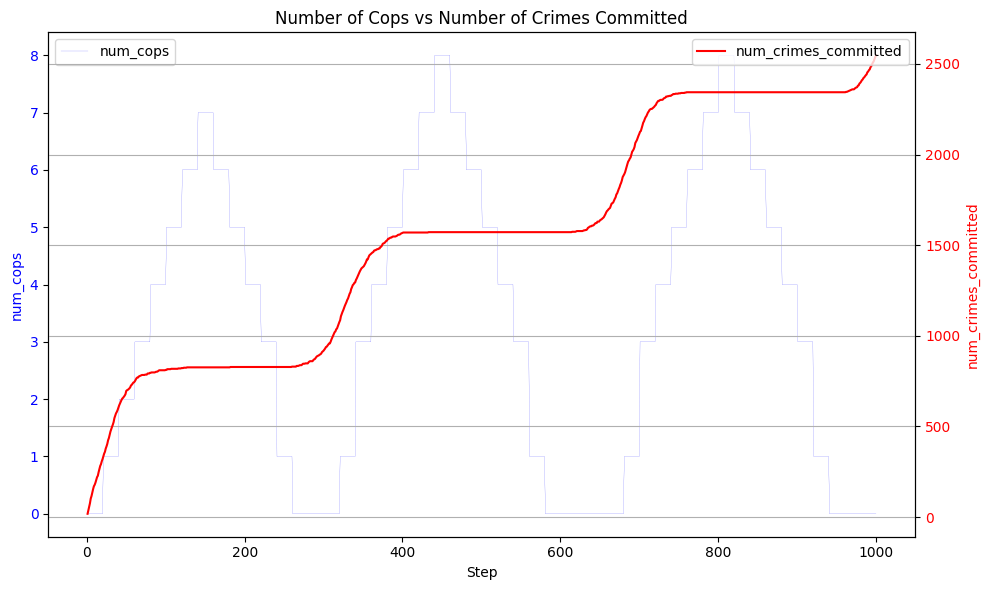

In [5]:
x = df['Step']  # Assuming 'Step' is your x-axis (you can replace it with the actual x-axis data)
y1 = df['num_cops']
y2 = df['num_crimes_committed']

# Plotting num_cops
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(x, y1, color='b', linewidth = 0.1, label='num_cops')
ax1.set_xlabel('Step')
ax1.set_ylabel('num_cops', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating second y-axis and plotting num_crimes_committed
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', label='num_crimes_committed')
ax2.set_ylabel('num_crimes_committed', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legend
plt.title('Number of Cops vs Number of Crimes Committed')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.grid(True)  # Optionally, add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

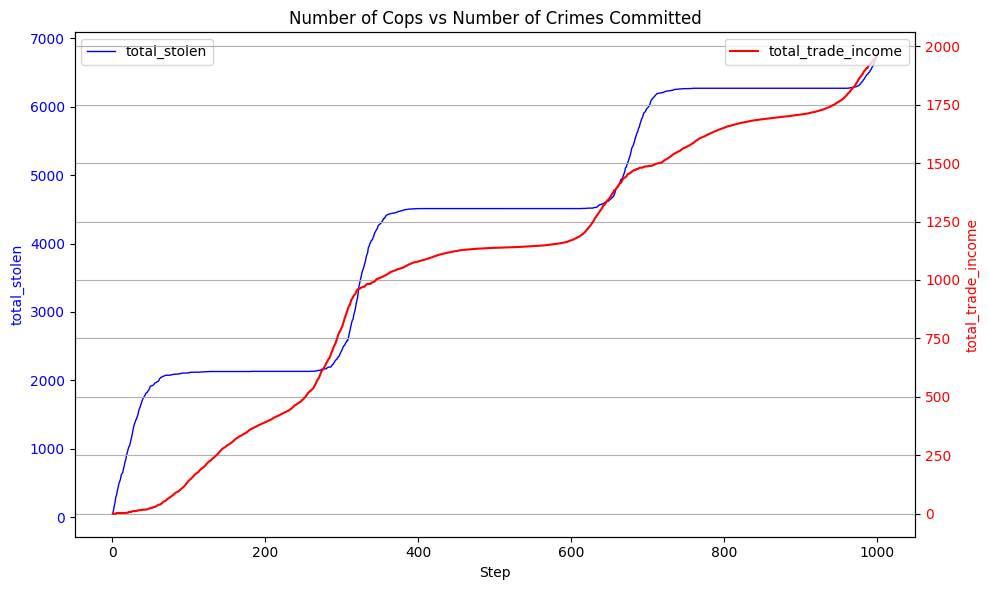

In [6]:
x = df['Step']  # Assuming 'Step' is your x-axis (you can replace it with the actual x-axis data)
y1 = df['total_stolen']
y2 = df['total_trade_income']

# Plotting num_cops
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(x, y1, color='b', linewidth = 1, label='total_stolen')
ax1.set_xlabel('Step')
ax1.set_ylabel('total_stolen', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating second y-axis and plotting num_crimes_committed
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', label='total_trade_income')
ax2.set_ylabel('total_trade_income', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legend
plt.title('Number of Cops vs Number of Crimes Committed')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.grid(True)  # Optionally, add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

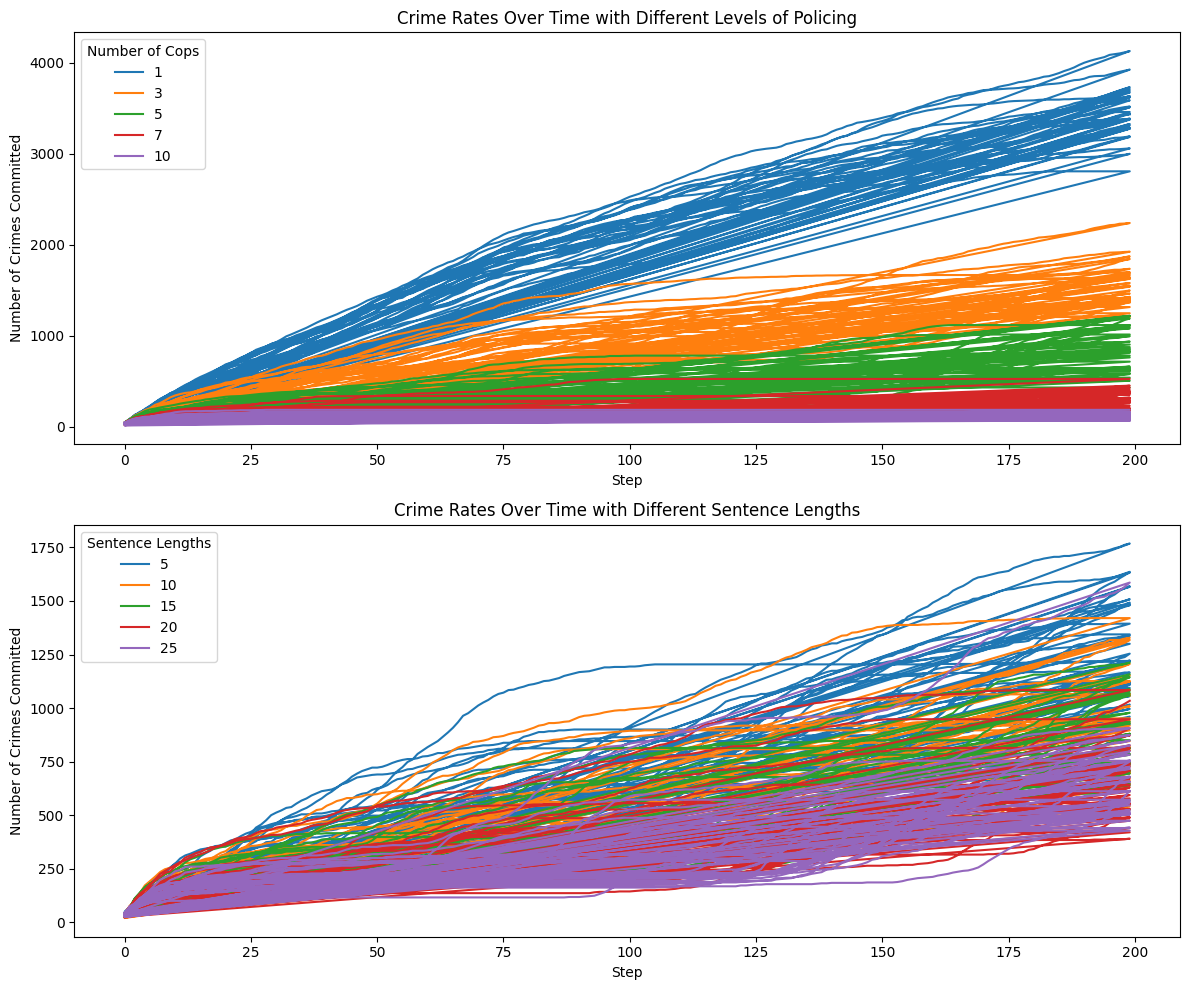

In [7]:
data_cops = pd.read_csv('../results/vary_cops_results.csv')
data_sentences = pd.read_csv('../results/vary_sentence_results.csv')

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

for label, df in data_cops.groupby('value'):
    ax[0].plot(df['Step'], df['num_crimes_committed'], label=f'{label}')
ax[0].set_title('Crime Rates Over Time with Different Levels of Policing')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Number of Crimes Committed')
ax[0].legend(title="Number of Cops")

for label, df in data_sentences.groupby('value'):
    ax[1].plot(df['Step'], df['num_crimes_committed'], label=f'{label}')
ax[1].set_title('Crime Rates Over Time with Different Sentence Lengths')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Number of Crimes Committed')
ax[1].legend(title="Sentence Lengths")

plt.tight_layout()
plt.show()


## Hypothesis 2: Collective wealth, perceived crime threat, and level of policing

In [8]:
data_cops

,Step,num_cops,num_crimes_committed,num_arrests_made,tax_rate,total_stolen,total_trade_income,avg_wealth,total_wealth,avg_crime_perception,vote_outcome,iteration,param,value
0,0,1.0,42.0,3.0,0.01,108.844097,0.000000,4.919507,245.975356,0.091000,0.0,1,cops,1
1,1,1.0,72.0,3.0,0.01,190.766100,2.880715,4.901938,245.096913,0.079000,0.0,1,cops,1
2,2,1.0,96.0,3.0,0.01,273.071807,6.059779,4.888658,244.432894,0.074000,0.0,1,cops,1
3,3,1.0,128.0,3.0,0.01,367.396334,7.715724,4.858137,242.906834,0.074000,0.0,1,cops,1
4,4,1.0,166.0,3.0,0.01,463.086897,7.715724,4.805080,240.253999,0.074000,0.0,1,cops,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,195,8.0,70.0,19.0,0.08,156.032985,479.518463,0.100918,5.045905,0.529667,0.0,30,cops,10
29996,196,8.0,70.0,19.0,0.08,156.032985,480.094265,0.099781,4.989041,0.529667,0.0,30,cops,10
29997,197,8.0,70.0,19.0,0.08,156.032985,480.704098,0.099097,4.954833,0.529667,0.0,30,cops,10
29998,198,8.0,70.0,19.0,0.08,156.032985,481.264623,0.097913,4.895650,0.529667,0.0,30,cops,10


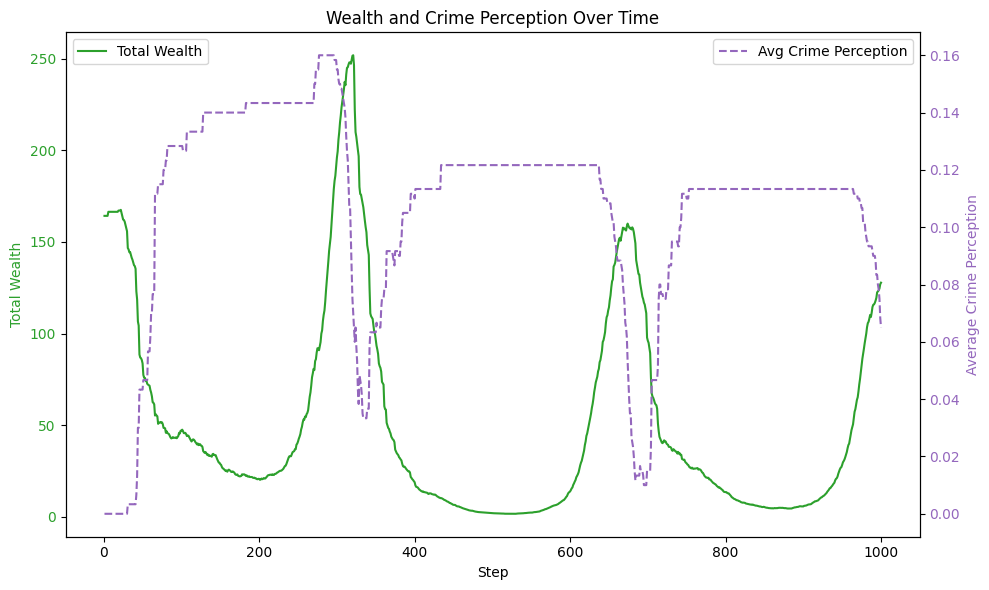

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:green'
ax1.set_xlabel('Step')
ax1.set_ylabel('Total Wealth', color=color)
ax1.plot(model_data['Step'], model_data['total_wealth'], color=color, label='Total Wealth')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Average Crime Perception', color=color)
ax2.plot(model_data['Step'], model_data['avg_crime_perception'], color=color, linestyle='--', label='Avg Crime Perception')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Wealth and Crime Perception Over Time')
fig.tight_layout() 

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

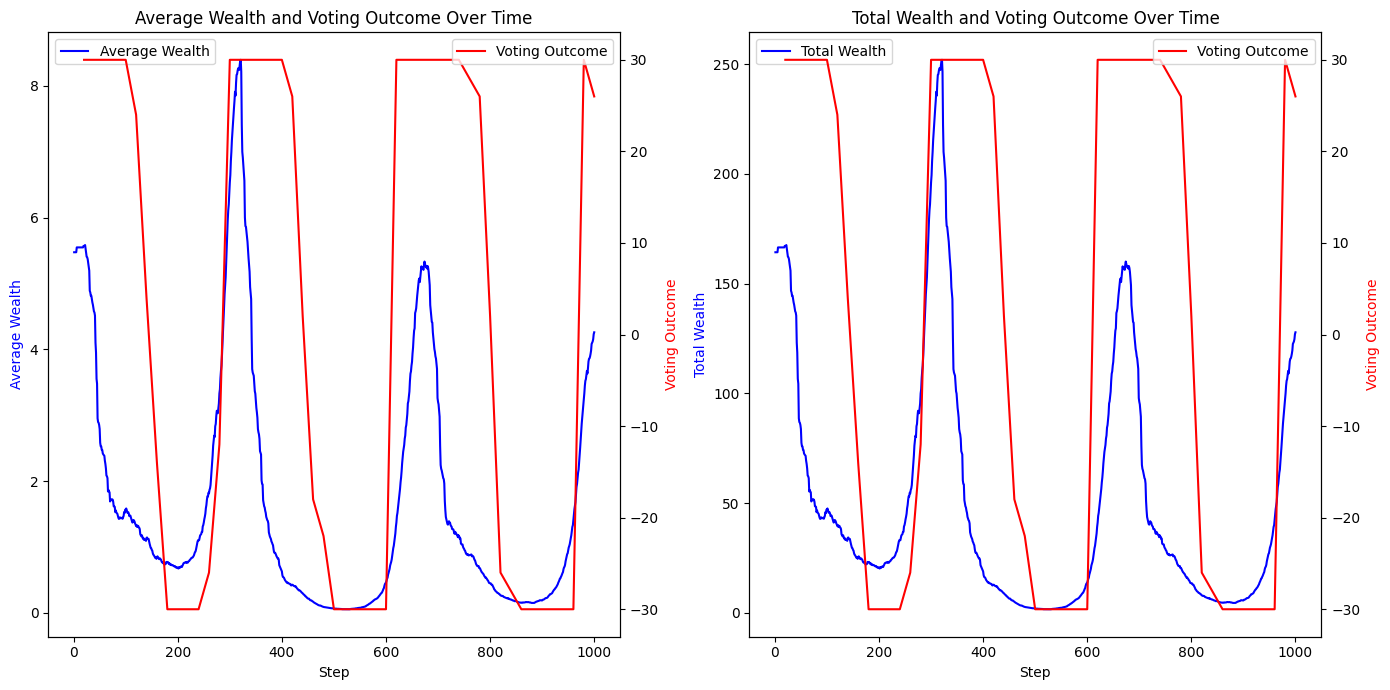

In [10]:
plt.figure(figsize=(14, 7))

# Average Wealth and Voting Outcome Over Time
plt.subplot(121)
ax1 = plt.gca() 
ax2 = ax1.twinx()
ax1.plot(model_data['Step'], model_data['avg_wealth'], 'b-', label='Average Wealth')
# # if tax is not decreases nor increases, we will not plot the vote outcome
non_zero_mask = model_data['vote_outcome'] != 0
ax2.plot(model_data['Step'][non_zero_mask], model_data['vote_outcome'][non_zero_mask], 'r-', label='Voting Outcome')

ax1.set_xlabel('Step')
ax1.set_ylabel('Average Wealth', color='b')
ax2.set_ylabel('Voting Outcome', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title('Average Wealth and Voting Outcome Over Time')

# Total Wealth vs Voting Outcome Over Time
plt.subplot(122)
ax1 = plt.gca() 
ax2 = ax1.twinx()
ax1.plot(model_data['Step'], model_data['total_wealth'], 'b-', label='Total Wealth')
# if tax is not decreases nor increases, we will not plot the vote outcome
non_zero_mask = model_data['vote_outcome'] != 0
ax2.plot(model_data['Step'][non_zero_mask], model_data['vote_outcome'][non_zero_mask], 'r-', label='Voting Outcome')

ax1.set_xlabel('Step')
ax1.set_ylabel('Total Wealth', color='b')
ax2.set_ylabel('Voting Outcome', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title('Total Wealth and Voting Outcome Over Time')

plt.tight_layout()
plt.show()

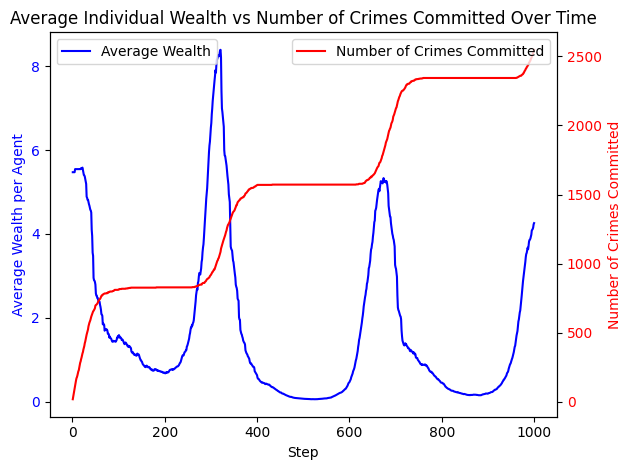

In [11]:
# to see if the level of average individual wealth would affect the number of crimes committed
fig, ax1 = plt.subplots()

ax1.plot(model_data['Step'], model_data['avg_wealth'], color='blue', label='Average Wealth')
ax1.set_xlabel('Step')
ax1.set_ylabel('Average Wealth per Agent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue') 

ax2 = ax1.twinx()
ax2.plot(model_data['Step'], model_data['num_crimes_committed'], color='red', label='Number of Crimes Committed')
ax2.set_ylabel('Number of Crimes Committed', color='red')
ax2.tick_params(axis='y', labelcolor='red')  

plt.title('Average Individual Wealth vs Number of Crimes Committed Over Time')
fig.tight_layout() 

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## Hypothesis 3: Wealth distribution and level of policing

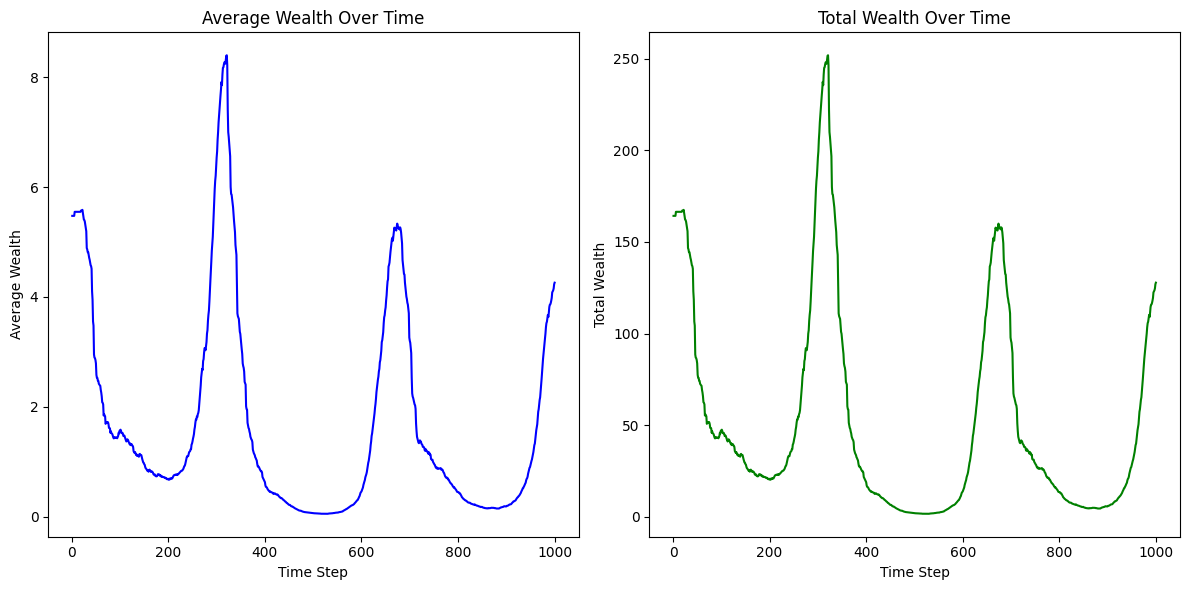

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(model_data['Step'], model_data['avg_wealth'], color='blue', label='Average Wealth')
ax[0].set_title('Average Wealth Over Time')
ax[0].set_xlabel('Time Step')
ax[0].set_ylabel('Average Wealth')

ax[1].plot(model_data['Step'], model_data['total_wealth'], color='green', label='Total Wealth')
ax[1].set_title('Total Wealth Over Time')
ax[1].set_xlabel('Time Step')
ax[1].set_ylabel('Total Wealth')

plt.tight_layout()
plt.show()

In [13]:
# turn MultiIndex into regular columns
agent_data.reset_index(inplace=True)
print(agent_data.head())


   Step  AgentID    wealth  num_been_crimed
0     1       22  5.952787              0.0
1     1       18  4.621329              0.0
2     1       27  6.983419              0.0
3     1       11  3.696693              1.0
4     1       13  0.548488              1.0


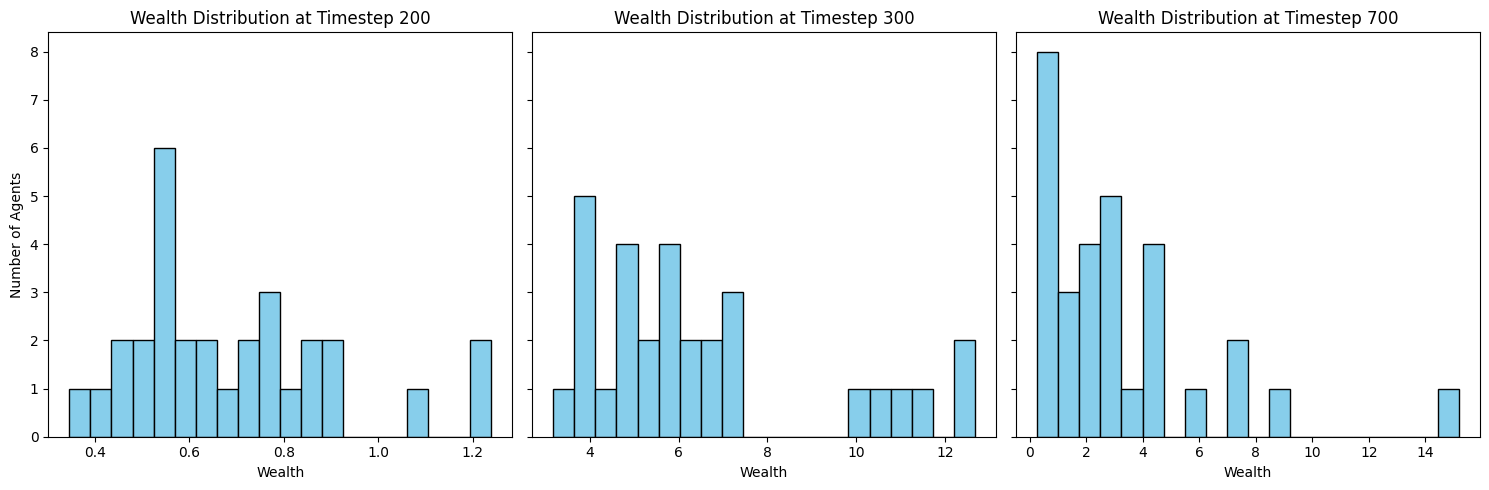

In [14]:
# to observe the distribution of wealth among individuals
selected_timesteps = [200, 300, 700]

fig, axes = plt.subplots(1, len(selected_timesteps), figsize=(15, 5), sharey=True)

for i, timestep in enumerate(selected_timesteps):
    ax = axes[i]
    timestep_data = agent_data[agent_data['Step'] == timestep]['wealth']
    ax.hist(timestep_data, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Wealth Distribution at Timestep {timestep}')
    ax.set_xlabel('Wealth')
    if i == 0:
        ax.set_ylabel('Number of Agents')

plt.tight_layout()
plt.show()

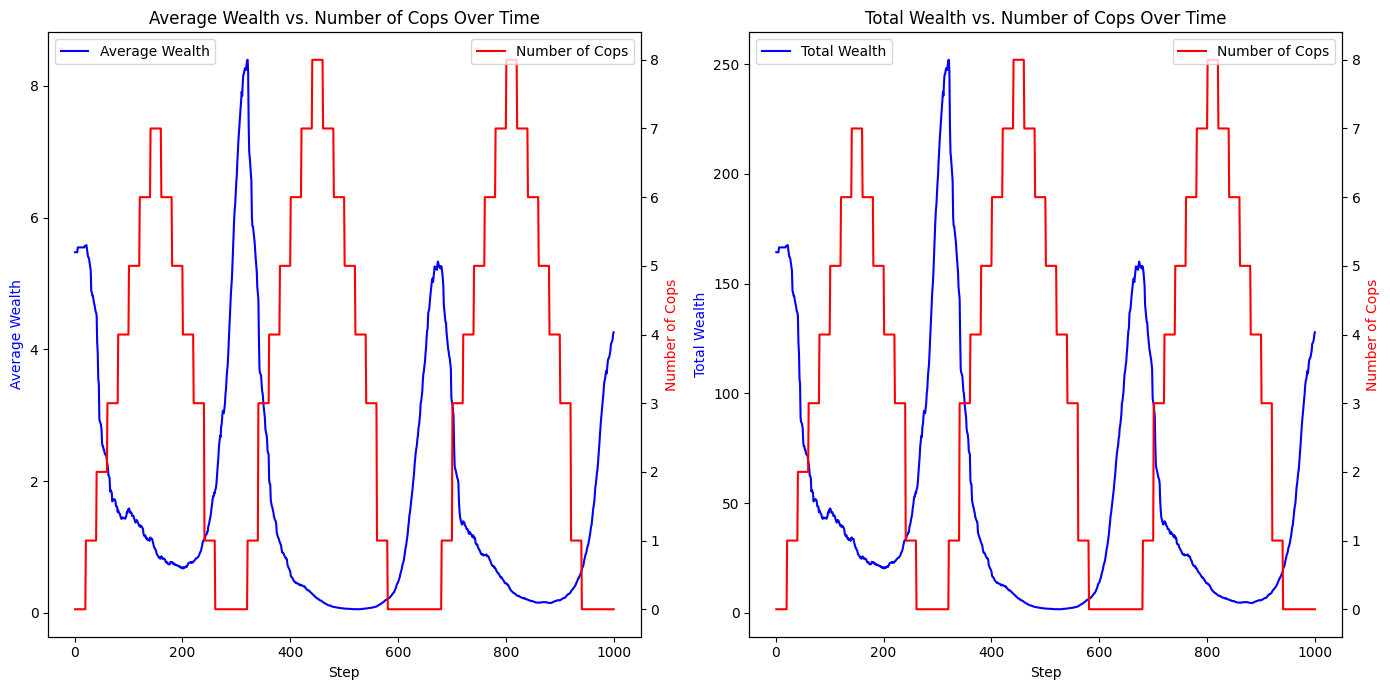

In [15]:
plt.figure(figsize=(14, 7))

# to see if the avg individual's wealth would affect the number of police
plt.subplot(121)
ax1 = plt.gca()  
ax2 = ax1.twinx() 

ax1.plot(model_data['Step'], model_data['avg_wealth'], 'b-', label='Average Wealth')
ax2.plot(model_data['Step'], model_data['num_cops'], 'r-', label='Number of Cops')

ax1.set_xlabel('Step')
ax1.set_ylabel('Average Wealth', color='b')
ax2.set_ylabel('Number of Cops', color='r')
ax1.set_title('Average Wealth vs. Number of Cops Over Time')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# to see if the overall economy (collective wealth) would affect the number of police
plt.subplot(122)
ax3 = plt.gca()
ax4 = ax3.twinx() 

ax3.plot(model_data['Step'], model_data['total_wealth'], 'b-', label='Total Wealth')
ax4.plot(model_data['Step'], model_data['num_cops'], 'r-', label='Number of Cops')

ax3.set_xlabel('Step')
ax3.set_ylabel('Total Wealth', color='b')
ax4.set_ylabel('Number of Cops', color='r')
ax3.set_title('Total Wealth vs. Number of Cops Over Time')

ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Others

Confidence interval plot


In [16]:
def calculate_confidence_intervals(results, col):
    grouped = results.groupby(['Step', 'value'])[col]
    means = grouped.mean()
    stds = grouped.std()
    counts = grouped.size()
    

    ci_low = means - 1.96 * (stds / np.sqrt(counts))
    ci_high = means + 1.96 * (stds / np.sqrt(counts))

    ci_df = pd.DataFrame({
        "mean": means,
        "ci_low": ci_low,
        "ci_high": ci_high
    }).reset_index()

    return ci_df

def plot_with_confidence_intervals(results, col):
    
    parameter_values = results['value'].unique()
    parameter_name = results['param'].unique()[0]

    plt.figure(figsize=(10, 6))

    for value in parameter_values:
        subset = results[results['value'] == value]
        ci_results = calculate_confidence_intervals(subset, col)

        plt.plot(ci_results['Step'], ci_results['mean'],label=f'{value}') 
        plt.fill_between(ci_results['Step'], ci_results['ci_low'], ci_results['ci_high'], alpha=0.3)

    plt.xlabel('Step')
    plt.ylabel(col.replace('_', ' ').title())  
    plt.title(f'{col.replace("_", " ").title()} over time with 95% Confidence Intervals')
    plt.legend(loc='lower right', title=parameter_name)
    plt.grid(True)
    plt.show()



def plot_with_confidence_intervals_and_dual_axis(results, col1, col2):

    parameter_values = results['value'].unique()
    parameter_name = results['param'].unique()[0]

    for value in parameter_values:
        subset = results[results['value'] == value] 
        ci_results_col1 = calculate_confidence_intervals(subset, col1)
        ci_results_col2 = calculate_confidence_intervals(subset, col2)


        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Plotting the first column with confidence intervals
        ax1.plot(ci_results_col1['Step'], ci_results_col1['mean'], label=f'{col1}', color='tab:blue')
        ax1.fill_between(ci_results_col1['Step'], ci_results_col1['ci_low'], ci_results_col1['ci_high'], color='tab:blue', alpha=0.3)
        ax1.set_xlabel('Step')
        ax1.set_ylabel(col1.replace('_', ' ').title(), color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Creating a twin y-axis for the second column

        ax2 = ax1.twinx()
        ax2.plot(ci_results_col2['Step'], ci_results_col2['mean'], label=f'{col2}', color='tab:orange', linestyle='dashed')
        ax2.fill_between(ci_results_col2['Step'], ci_results_col2['ci_low'], ci_results_col2['ci_high'], color='tab:orange', alpha=0.3)
        ax2.set_ylabel(col2.replace('_', ' ').title(), color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')

        # Title and layout adjustments
        plt.title(f'{col1.replace("_", " ").title()} and {col2.replace("_", " ").title()} Over Time for {parameter_name} Level: {value}')
        fig.tight_layout()
        fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

        plt.show()


## Prosperity

In [17]:
data_prosperity= pd.read_csv('../results/vary_prosperity_results.csv')
data_prosperity1 = pd.read_csv('../results/vary_prosperity_results.1.csv')

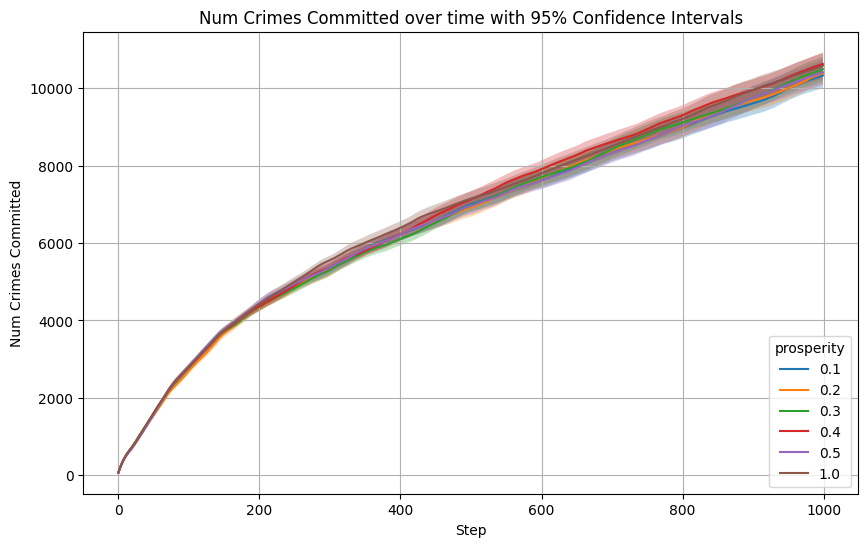

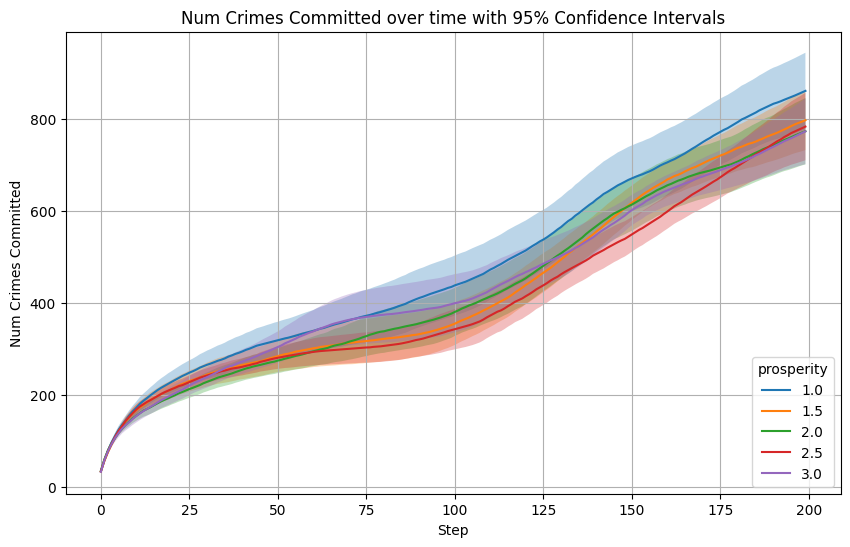

In [18]:

plot_with_confidence_intervals(data_prosperity, 'num_crimes_committed')
plot_with_confidence_intervals(data_prosperity1, 'num_crimes_committed')

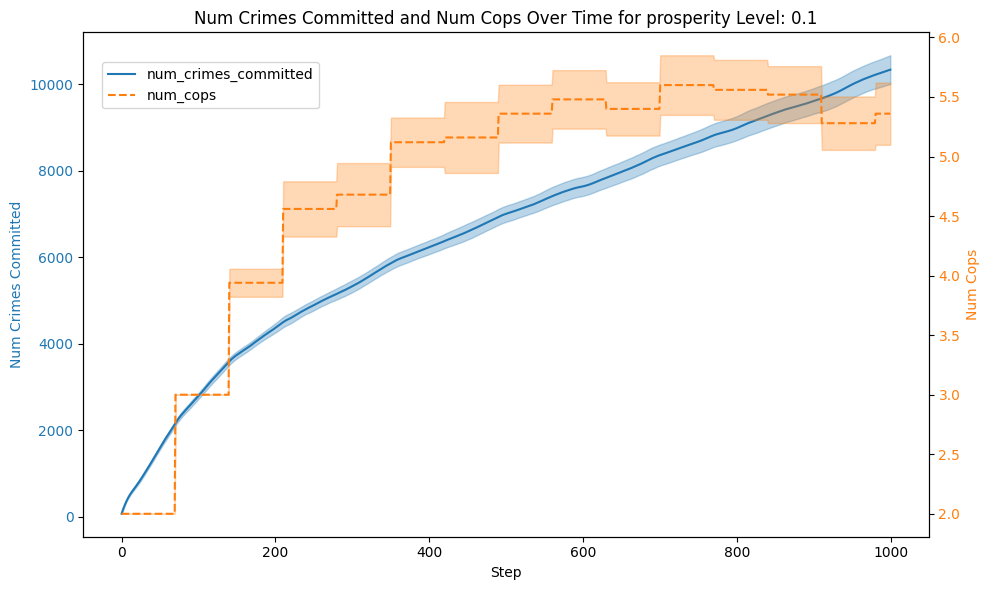

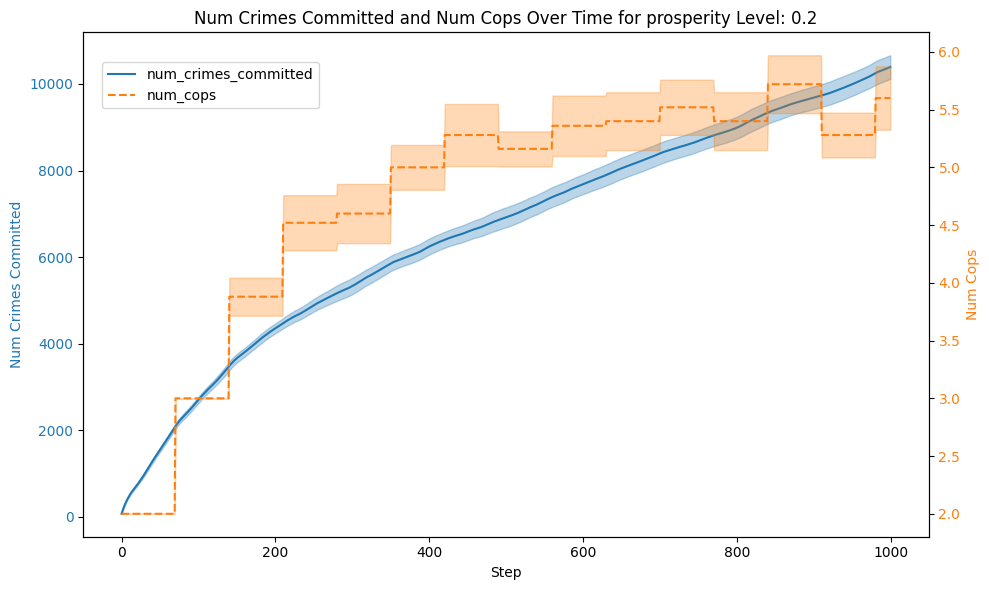

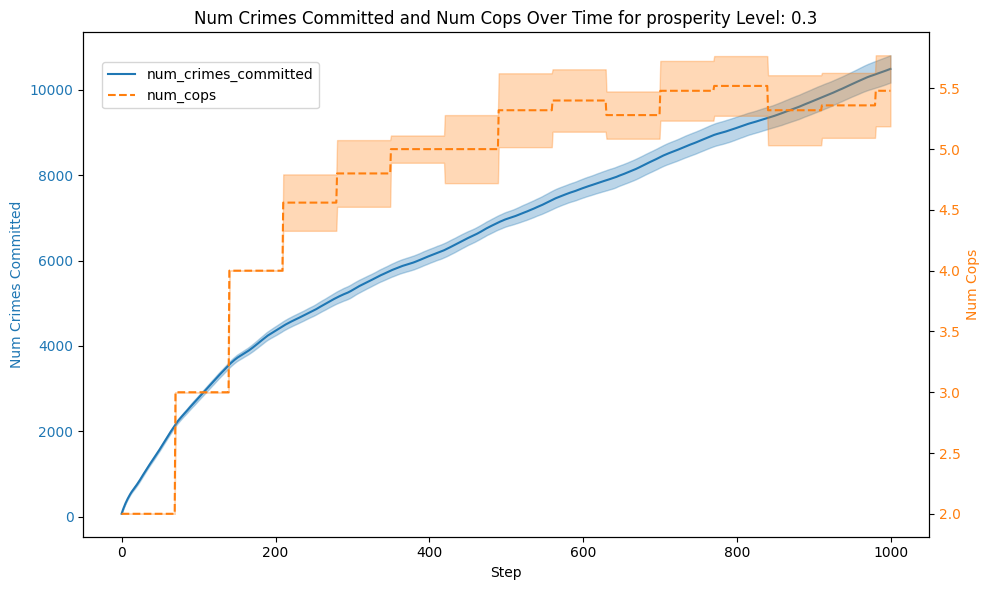

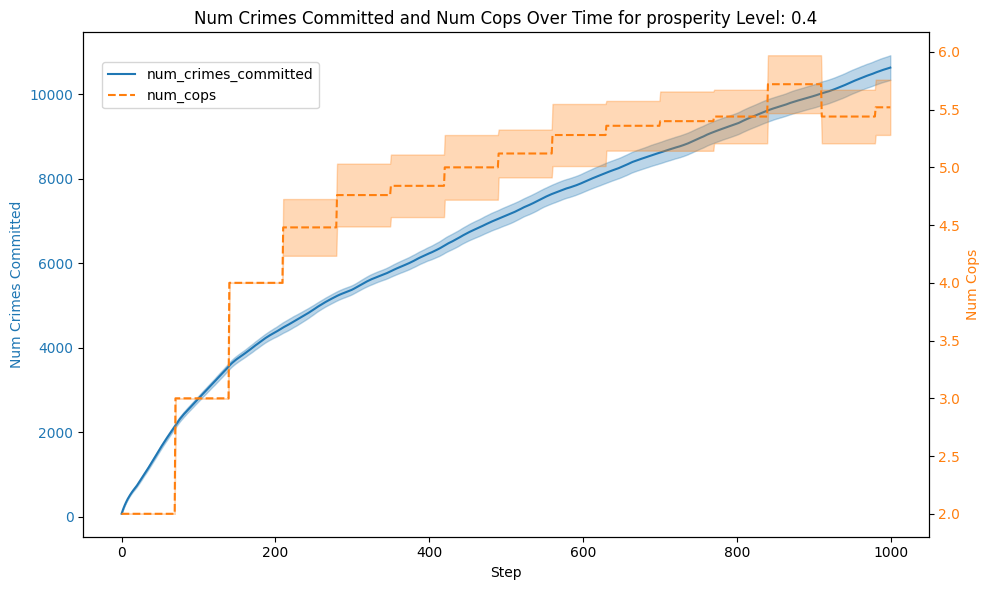

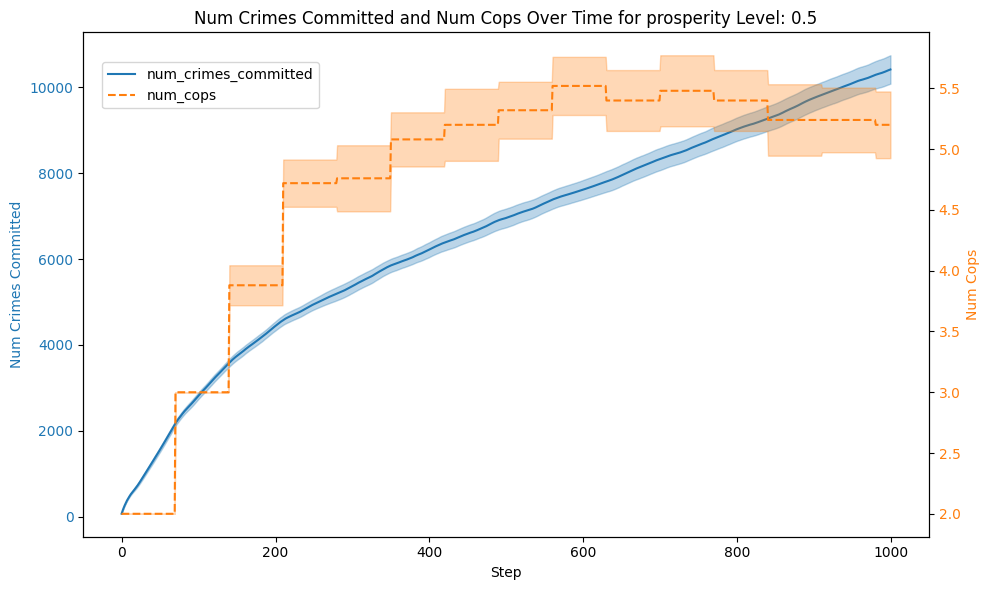

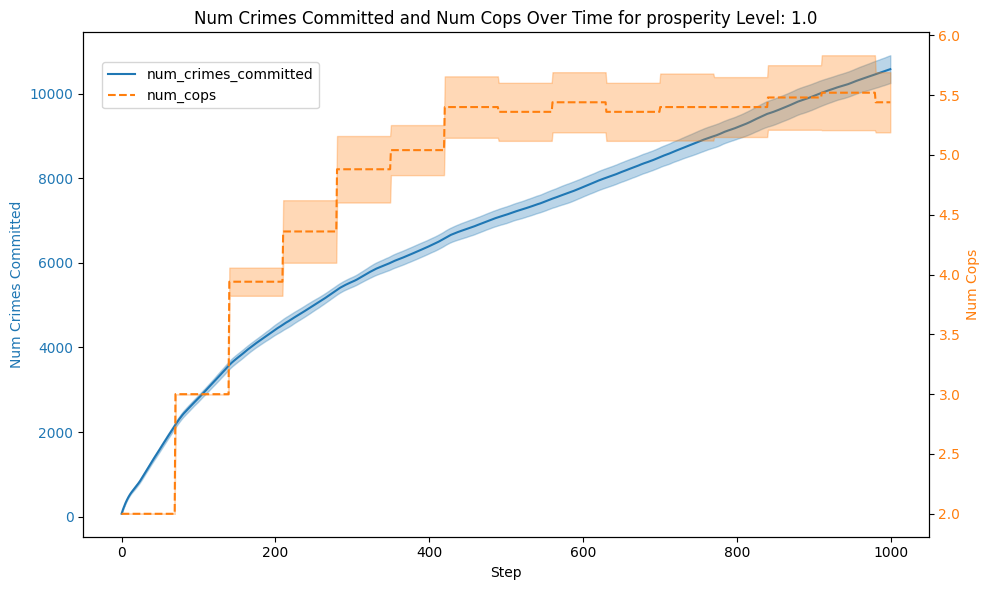

In [19]:
# Number of Crimes Committed and Number of Cops
# Mean of number of cops and number of crimes committed over time
plot_with_confidence_intervals_and_dual_axis(data_prosperity, 'num_crimes_committed', 'num_cops')

In [20]:
# Mean of the last iteration of number of cops for each level of prosperity

grouped = data_prosperity.groupby('value') 
cop_end_iter = []
for i in grouped:
    cop = i[1][i[1]['Step'] == 999]['num_cops']
    cop_end_iter.append(cop)

print(int(cop_end_iter[0].mean()))
print(int(cop_end_iter[1].mean()))
print(int(cop_end_iter[2].mean()))
print(int(cop_end_iter[3].mean()))
print(int(cop_end_iter[4].mean()))
print(int(cop_end_iter[5].mean()))

5
5
5
5
5
5


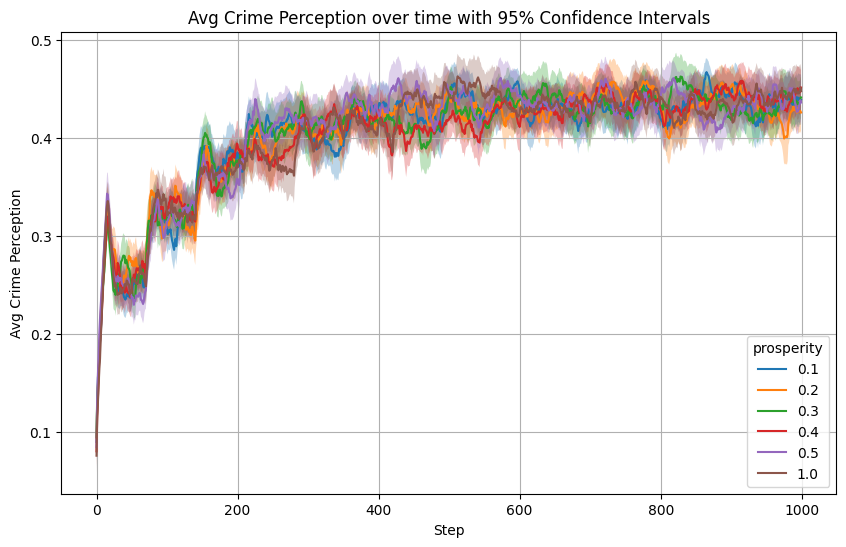

In [21]:
plot_with_confidence_intervals(data_prosperity, 'avg_crime_perception')

## Election Frequency

In [22]:
data_elec_freq= pd.read_csv('../results/vary_election_freq_results.csv')

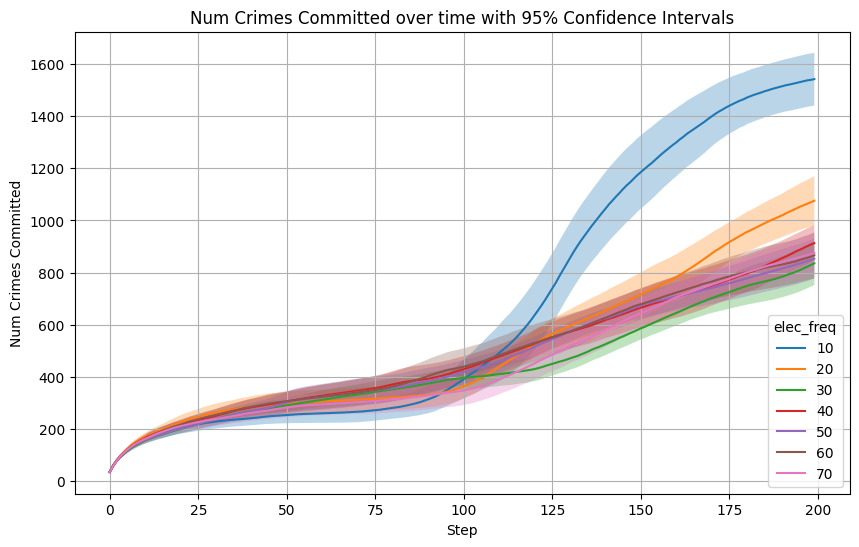

In [23]:
plot_with_confidence_intervals(data_elec_freq, 'num_crimes_committed')